In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv("SICK.txt", sep="\t")
df = df[["sentence_A", "sentence_B", "entailment_label"]]
print("原始資料形狀:", df.shape)

df["entailment_label"] = df["entailment_label"].str.lower()
label2id = {"contradiction": 0, "entailment": 1, "neutral": 2}
df["label_id"] = df["entailment_label"].map(label2id)

df["text"] = df["sentence_A"] + " " + df["sentence_B"]

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df["label_id"], random_state=42
)
print("訓練集形狀:", train_df.shape, "測試集形狀:", test_df.shape)

原始資料形狀: (9840, 3)
訓練集形狀: (7872, 5) 測試集形狀: (1968, 5)


In [8]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_df["text"])

X_train_full = vectorizer.transform(train_df["text"])  # 訓練特徵
X_test = vectorizer.transform(test_df["text"])           # 測試特徵

y_train_full = train_df["label_id"].values
y_test = test_df["label_id"].values


使用訓練資料數量: 20 筆
Test Accuracy: 0.4726
Classification Report:
               precision    recall  f1-score   support

contradiction       0.21      0.25      0.23       285
   entailment       0.28      0.15      0.20       564
      neutral       0.58      0.69      0.63      1119

     accuracy                           0.47      1968
    macro avg       0.36      0.36      0.35      1968
 weighted avg       0.44      0.47      0.45      1968

Confusion Matrix:
[[ 70  48 167]
 [ 81  86 397]
 [177 168 774]]


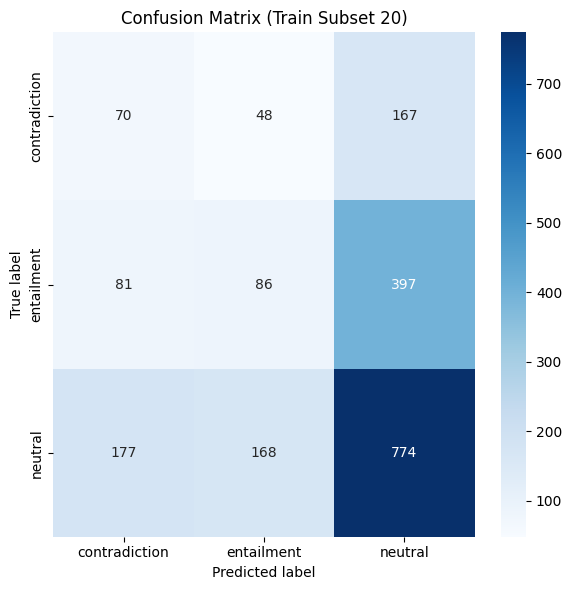


使用訓練資料數量: 50 筆
Test Accuracy: 0.4568
Classification Report:
               precision    recall  f1-score   support

contradiction       0.22      0.16      0.19       285
   entailment       0.29      0.29      0.29       564
      neutral       0.58      0.61      0.59      1119

     accuracy                           0.46      1968
    macro avg       0.36      0.36      0.36      1968
 weighted avg       0.44      0.46      0.45      1968

Confusion Matrix:
[[ 47  68 170]
 [ 64 165 335]
 [104 328 687]]


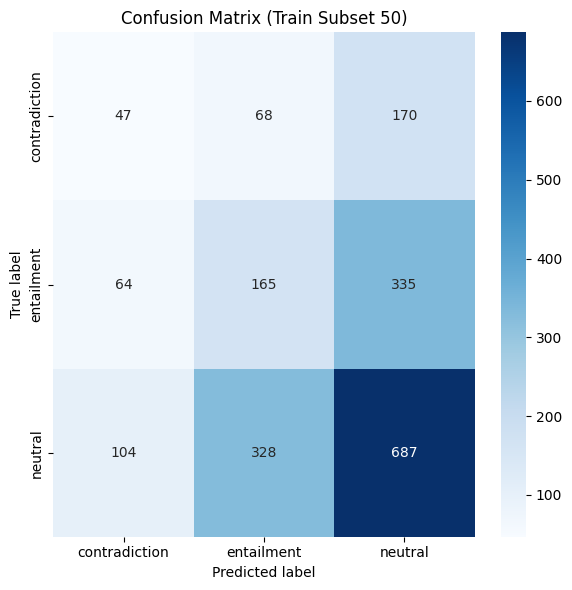


使用訓練資料數量: 70 筆
Test Accuracy: 0.4782
Classification Report:
               precision    recall  f1-score   support

contradiction       0.19      0.16      0.17       285
   entailment       0.32      0.23      0.27       564
      neutral       0.58      0.68      0.63      1119

     accuracy                           0.48      1968
    macro avg       0.36      0.36      0.36      1968
 weighted avg       0.45      0.48      0.46      1968

Confusion Matrix:
[[ 46  49 190]
 [ 76 129 359]
 [126 227 766]]


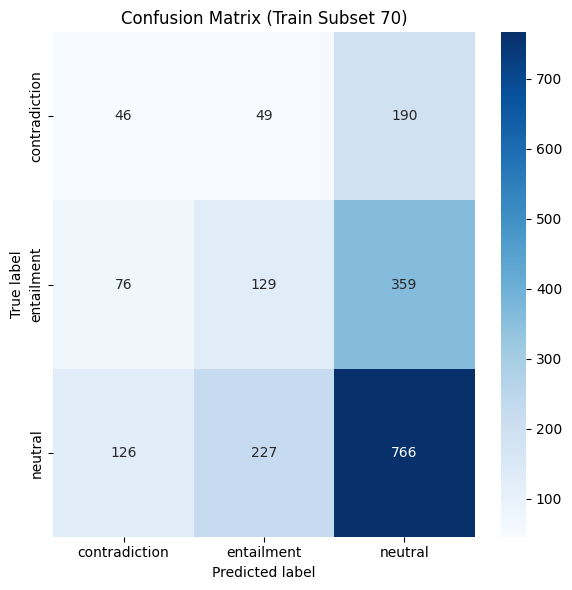


使用訓練資料數量: 100 筆
Test Accuracy: 0.5158
Classification Report:
               precision    recall  f1-score   support

contradiction       0.20      0.09      0.12       285
   entailment       0.33      0.18      0.23       564
      neutral       0.58      0.80      0.67      1119

     accuracy                           0.52      1968
    macro avg       0.37      0.35      0.34      1968
 weighted avg       0.45      0.52      0.46      1968

Confusion Matrix:
[[ 26  37 222]
 [ 42  99 423]
 [ 63 166 890]]


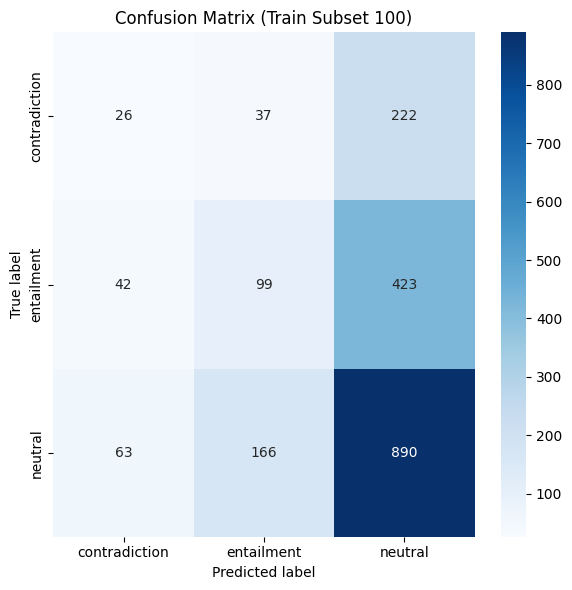


使用訓練資料數量: 300 筆
Test Accuracy: 0.4975
Classification Report:
               precision    recall  f1-score   support

contradiction       0.24      0.19      0.21       285
   entailment       0.31      0.18      0.23       564
      neutral       0.58      0.74      0.65      1119

     accuracy                           0.50      1968
    macro avg       0.38      0.37      0.36      1968
 weighted avg       0.46      0.50      0.47      1968

Confusion Matrix:
[[ 55  46 184]
 [ 53 101 410]
 [122 174 823]]


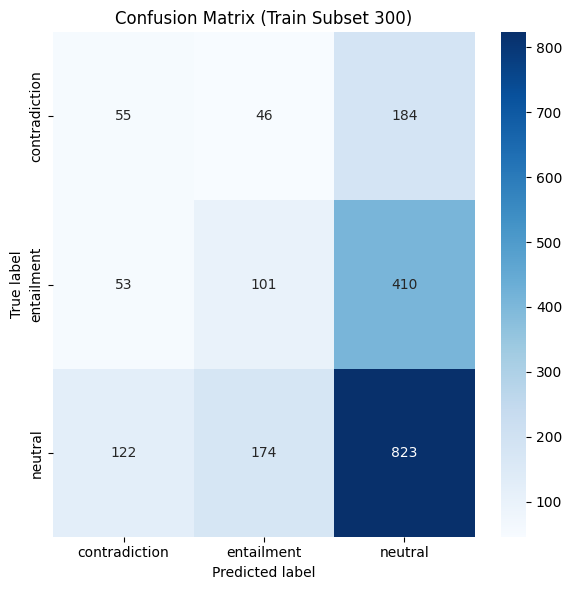


使用訓練資料數量: 1000 筆
Test Accuracy: 0.4426
Classification Report:
               precision    recall  f1-score   support

contradiction       0.19      0.22      0.20       285
   entailment       0.29      0.26      0.28       564
      neutral       0.58      0.59      0.58      1119

     accuracy                           0.44      1968
    macro avg       0.36      0.36      0.36      1968
 weighted avg       0.44      0.44      0.44      1968

Confusion Matrix:
[[ 62  70 153]
 [ 89 149 326]
 [172 287 660]]


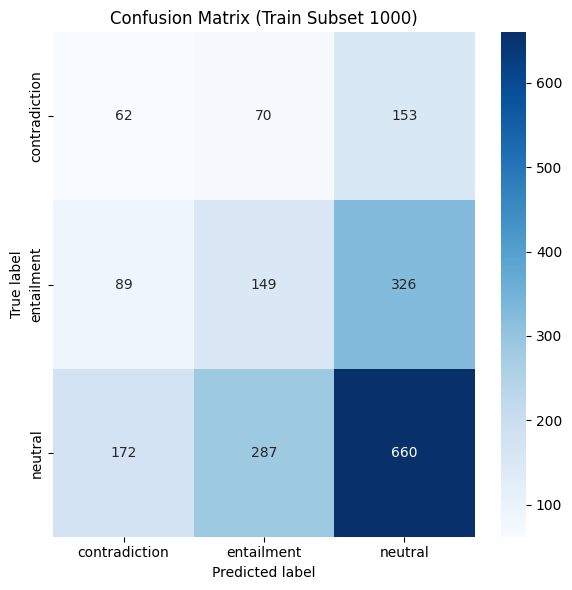


使用訓練資料數量: 7872 筆
Test Accuracy: 0.5386
Classification Report:
               precision    recall  f1-score   support

contradiction       0.22      0.15      0.18       285
   entailment       0.37      0.30      0.33       564
      neutral       0.65      0.75      0.70      1119

     accuracy                           0.54      1968
    macro avg       0.41      0.40      0.40      1968
 weighted avg       0.51      0.54      0.52      1968

Confusion Matrix:
[[ 44  95 146]
 [ 85 172 307]
 [ 73 202 844]]


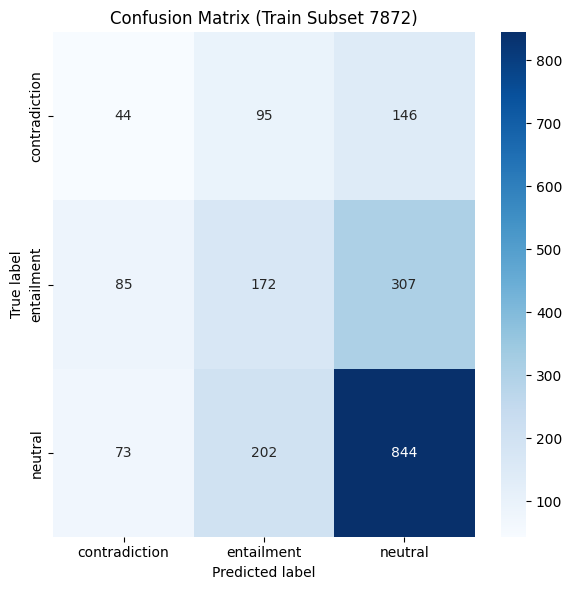

Accuracy Summary:
   train_samples  test_accuracy
0             20       0.472561
1             50       0.456809
2             70       0.478150
3            100       0.515752
4            300       0.497459
5           1000       0.442581
6           7872       0.538618


In [10]:
accuracy_summary = []
sample_sizes = [20, 50, 70, 100, 300, 1000, len(train_df)]

for size in sample_sizes:
    print(f"\n使用訓練資料數量: {size} 筆")
    # 從完整訓練集取前 size 筆資料作為訓練子集
    X_train = X_train_full[:size]
    y_train = y_train_full[:size]
    
    # 建立 KNN 模型 (這裡 n_neighbors=5，可根據需求調整)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # 在完整測試集上做預測
    y_pred = knn.predict(X_test)
    
    # 計算 accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    
    # 輸出分類報告
    target_names = ["contradiction", "entailment", "neutral"]
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # 混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # 繪製混淆矩陣圖
    import seaborn as sns
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix (Train Subset {size})")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

    accuracy_summary.append({"train_samples": size, "test_accuracy": acc})

summary_df = pd.DataFrame(accuracy_summary)
print("Accuracy Summary:")
print(summary_df)
 

